# Lab 1b - GNSS for Tectonic Deformation and Hazard

In this lab we will consider what Global Navigational Satellite Systems (GNSS) data tell us about earthquake hazard on the central San Andreas Fault. In particular, we will consider the difference in the geodetic signatures of locked and creeping faults. 

## An important lesson from a major catastrophe
In 1906 the great San Fransisco earthquake occurred and resulted in the destruction of much of San Fransisco (although the largest amount of damage was actually due to the fires that burned as a result of broken gas lines and no water to put them out because of broken water lines). I encourage you to take a look at the __[Wikipedia](https://en.wikipedia.org/wiki/1906_San_Francisco_earthquake)__ description of the event, which describes in detail the aftermath of the event itself and the national and international repercussions in the economy and finance industry of the time. Should such an earthquake happen again today, there would likely be some improvement in damaged buildings, but many of the cities' older buildings and sectors, including gas lines, are still vulnerable. 

The size of the earthquake is uncertain due to the lack of good observations from that time; however, scientists at the United States Geological Survey (USGS) have __[estimated that the earthquake was an MW 7.7 or 7.9](https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/magnitude.php)__. "MW" stands for "moment magnitude," and is different from the "Richter magnitude." The Richter magnitude scale is no longer used much by scientists because it describes the intensity of shaking, rather than the actual size of the earthquake, and so it can vary a bit depending on site conditions (e.g., soft soils shake harder than bedrock). 

However, the __[lessons learned from the 1906 earthquake](https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/revolution.php)__ are still applied today. The __[**theory of elastic rebound**](https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/reid.php)__, which we will use in this lab, is a fundamental idea about how earthquakes work. Why is the theory important? Because it allows us to make predictions of how much slip will happen in the next earthquake. By measuring how much of a fault is "locked," we can turn that around to say how large the next earthquake is likely to be. We will do this in this lab.

## The San Andreas Fault
The San Andreas Fault (abbreviated SAF) is the largest strike-slip fault system in the United States, and produced both the MW 7.7 San Fransisco earthquake as well as the MW 7.9 Fort Tejon earthquake that occurred in southern California. We will be looking at data around the SAF at the northern end of the Fort Tejon earthquake rupture, near Parkfield, CA. North of this area the SAF is creeping at the surface. 

## GNSS time-series
Processing raw GNSS data for tectonic studies is a highly technical skill that we will not be able to address in this course. Instead, we will access publicly-available data that has already been processed up to the time-series level. This time-series data contains one position point in three dimensions for a given station on a daily frequency. The data is available from several different sources, including the __[University of Nevada at Reno](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap_MAG.html)__ and __[UNAVCO](https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html)__; the latter has data from several different sources. Using data already pre-processed will save a lot of time for this lab, but be aware that each processing agency has its own set of stations and quirks that must be investigated for real research-level work.

In [1]:
# First import the libraries and set up some helpful functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def cosd(angle_in_degrees):
    return np.cos(np.radians(angle_in_degrees))
def sind(angle_in_degrees):
    return np.sin(np.radians(angle_in_degrees))

In [2]:
# Load some GNSS velocities 
# These velocities are from UNAVCO (see website link above) and are in the North American 2014 reference frame
gnss_vels_Parkfield = pd.read_csv('../data/GNSS_Vels.csv')
gnss_vels_Parkfield.head()

,SITE_NAME,Lat,Lon,Veast,Vnorth,Vup,sigEast,sigNorth,sigUp
0,ALTH,36.889607,239.330237,-0.00931,0.01036,-0.04385,0.00113,0.00039,0.00765
1,ALTH,36.889607,239.330237,-0.00931,0.01036,-0.04385,0.00113,0.00039,0.00765
2,BKR1,35.132389,240.890520,-0.01356,0.01318,-0.03680,0.00083,0.00113,0.00844
3,BKR1,35.132388,240.890520,-0.01356,0.01318,-0.03680,0.00083,0.00113,0.00844
4,BVPP,35.157277,240.652491,-0.01736,0.01510,-0.00046,0.00035,0.00019,0.00134


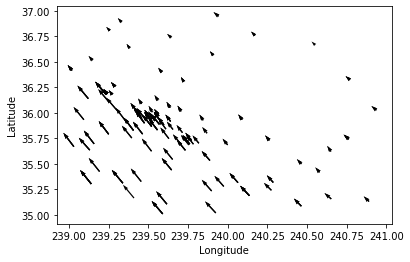

In [3]:
# Plot the data
plt.quiver(gnss_vels_Parkfield['Lon'], gnss_vels_Parkfield['Lat'], gnss_vels_Parkfield['Veast'], gnss_vels_Parkfield['Vnorth'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The image shows some of these same stations plotted in the UNAVCO GNSS viewer to give you a better idea of where they are. The view is extended to Los Angeles for reference. 
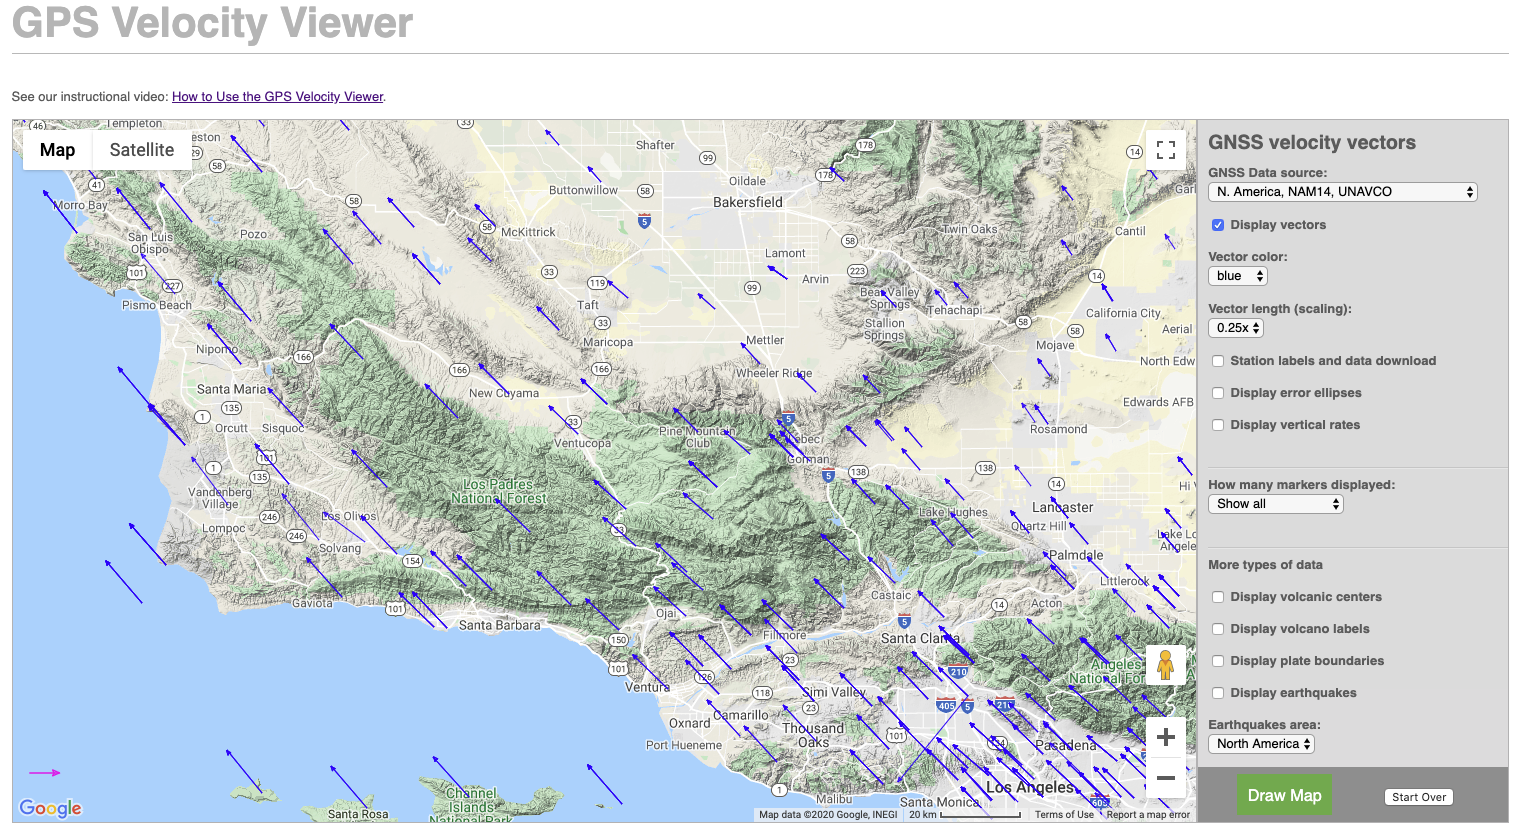

In order to better view and model these data, we will first rotate them into a coordinate system that is parallel to the San Andreas Fault. 

In [7]:
Rotation_matrix = np.array([[cosd(40), sind(40)], [sind(-40), cosd(40)]])
Vrotated = Rotation_matrix*np.array([gnss_vels_Parkfield['Veast'], gnss_vels_Parkfield['Vnorth']]).T
Vpar = Vrotated[:,0]
Vperp = Vrotated[:,1]